# 3.2. Linear Regression Implementation from Scratch

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 3.2.1. Generating the Dataset

In [2]:
# assume that the standard assumptions hold and thus that  ϵ  obeys a normal distribution with mean of 0
# set its standard deviation to 0.01 => Generate synthetic dataset

def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

features: tensor([1.0933, 0.6812]) 
label: tensor([4.0849])


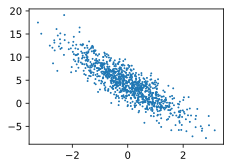

In [3]:
#generating a scatter plot using the second feature features[:, 1] and labels
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

## 3.2.2. Reading the Dataset

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

# read and print the first small batch of data examples
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.6813,  1.2166],
        [ 0.3467,  1.3444],
        [ 0.8399, -2.1330],
        [-0.7686,  0.0286],
        [ 0.4738,  0.5373],
        [ 0.4536, -0.5311],
        [ 1.0872, -1.8571],
        [-0.1272, -0.7210],
        [-1.1347,  0.5391],
        [ 0.8701, -0.2085]]) 
 tensor([[ 1.4288],
        [ 0.3018],
        [13.1474],
        [ 2.5767],
        [ 3.3035],
        [ 6.9201],
        [12.6846],
        [ 6.3864],
        [ 0.0838],
        [ 6.6381]])


## 3.2.3. Initializing Model Parameters

In [5]:
# initialize weights by sampling random numbers from a normal distribution
# mean 0 and a standard deviation of 0.01, and setting the bias to 0.
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 3.2.4. Defining the Model

In [6]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

## 3.2.5. Defining the Loss Function

In [7]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6. Defining the Optimization Algorithm

In [8]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 3.2.7. Training

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029409
epoch 2, loss 0.000104
epoch 3, loss 0.000051


In [10]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0006,  0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0006], grad_fn=<RsubBackward1>)


## 3.2.8. Summary

We saw how a deep network can be implemented and optimized from scratch, using just tensors and auto differentiation, without any need for defining layers or fancy optimizers.

This section only scratches the surface of what is possible. In the following sections, we will describe additional models based on the concepts that we have just introduced and learn how to implement them more concisely.